# Black Friday Data Analysis

This notebook looks into using various Python-based data scinece libaries to discover patterns and answer important questions about Black Friday.  


__Method:__

1. Business understanding  
2. Prepare data 
3. Evaluation /Analyzing  
4. Final Conclusion 


__Business Understanding__ 

1. Black Friday has become a major retail shopping expectation. Black Friday has routinely been the busiest shopping day of the year in the United States at least since 2005. __Importantly, this day represented the point in the year when retailers begin to turn a profit.__

We want to know if a store had to prepare for Black Friday this information would be valuable:

- How much does someone typically spend on Black Friday? (Which User in this dataset)
- What are the most popular items bought? 
- What age group and gender should be marketed to?
- What occupations have the highest purchase rate? 

__Prepare Data__

2. This data was retreived from kaggle. This dataset gives us an overview of the following categories related to Black Friday that will be used to answers the business related questions. 

- Product_ID

- Gender

- Age

- Occupation

- City_Category

- Stay_In_Current_City_Years

- Marital_Status

- Product_Category_1

- Product_Category_2


__Evaluation/Analyzing__

3. Initial evaluaiton will help determine what needs to be cleaned and/or removed from the dataset to accurately answer the business related questions. 

- Check for missing values
- Check data types are correct 
- Removing unnecessary data 

__Analyzing__
- visualize the data (heatmap, clustermap, histographs etc)
- Make conclusion based on the data


__Final Conclusion__

4. Concluded everything and make an accurate analysis about Black Friday related to the questions.__If a store owner had access to this data analysis what would they do? what would they sell? What age group spends the most money. Apply this knowledge in a practical and realistic way.__ 


In [1]:
#Import all the tools we need 

#Regular EDA amd plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# Keep plots to appear inside the notebook
%matplotlib inline 


# First Initial Inspection 

In [9]:
# read in csv file 
bf = pd.read_csv("BlackFriday.csv")

In [10]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
bf.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [8]:
#Initial inspection 
bf.shape

(537577, 12)

- Row numbers = 537577
- Columns = 12

In [5]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


- Only Product Category 2 and 3 have missing values => total no of non-null are less than total samples.
- There are 2 features of float type, 5 features of int type, 5 features of object type(String).
- Stay_In_Current_City_Years should be int.
- Age should be int.

In [6]:
bf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


# Prepare Data

- Check misisng values
- Change datatypes fo incorrect columns
- Check duplicates 

In [13]:
#Check missing values 
bf.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

#### Missing Values:
Only Product_Category_2 & Product_Category_3 has missing values. I assume these products do not fit in any category. Black Friday stores spans across many different types of products whch may result in misisng values for types of products.   

#### Action:
Replace missing values with 0. 

In [15]:
bf['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [16]:
bf['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [17]:
bf.fillna(0, inplace = True)

In [18]:
#Confirm change 
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [29]:
#Check duplicates 
sum(bf.duplicated())

0

In [19]:
# Change incorrect datatypes for Products 
bf.Product_Category_3 = bf.Product_Category_3.astype('int64')
bf.Product_Category_2 = bf.Product_Category_2.astype('int64')

In [20]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Product_Category_2          537577 non-null  int64 
 10  Product_Category_3          537577 non-null  int64 
 11  Purchase                    537577 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 49.2+ MB


In [21]:
bf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2,0,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15,16,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15,0,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,0,0,7172


# Business Questions 

- How much does someone typically spend on Black Friday?(Which User in this dataset)
- What are the most popular items bought?
- What age group and gender should be marketed to?
- What occupations have the highest purcahse rate? 


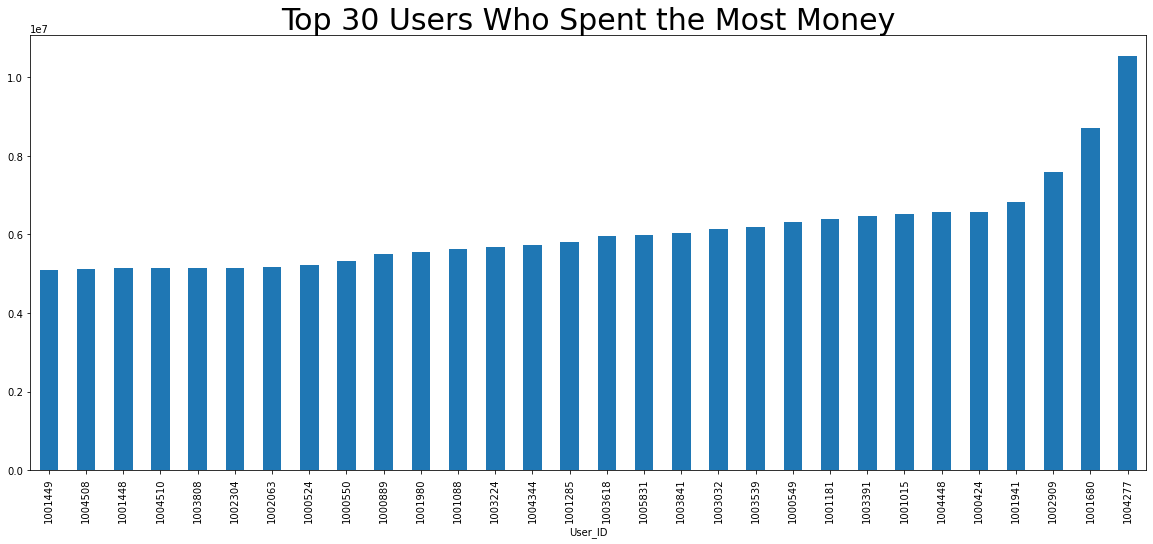

In [64]:
#How much did users typically spend? 
plt.figure(figsize = (20,8))
bf.groupby('User_ID')['Purchase'].sum().nlargest(30).sort_values().plot(kind = 'bar')
plt.title("Top 30 Users Who Spent the Most Money", fontsize = 30 );

__Conclusion From Data__

High spending customers are very valuable to any business. Identifying what users spend can influence all sorts of decisons a business makes.

- Pricing of products
- Loyalty rewards program for spending amount 
- Adverts for products

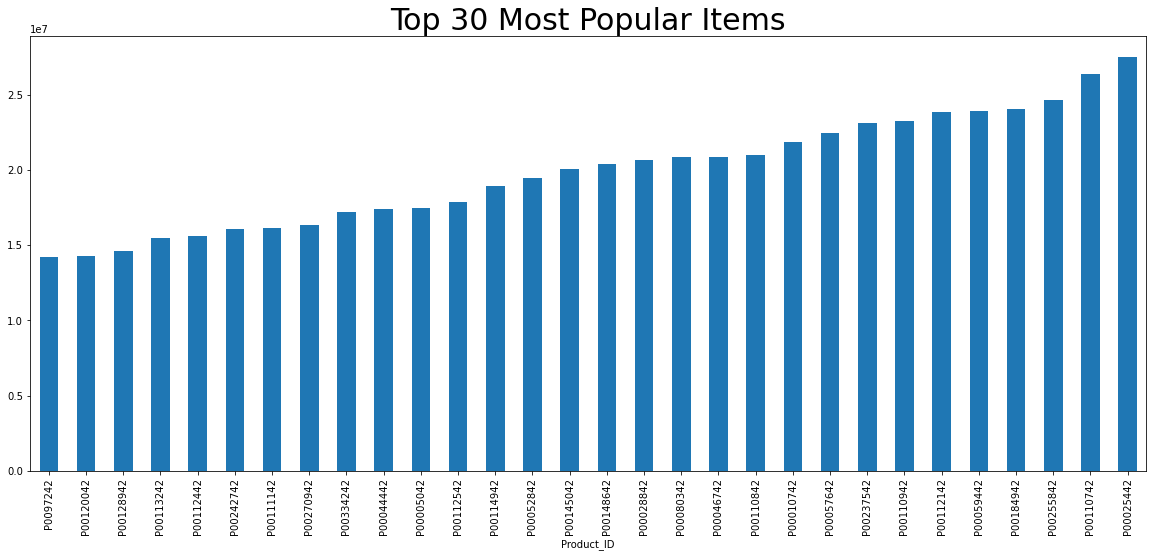

In [30]:
# What are the most popular items bought?
plt.figure(figsize = (20,8))
bf.groupby('Product_ID')['Purchase'].sum().nlargest(30).sort_values().plot(kind = 'bar')
plt.title("Top 30 Most Popular Items", fontsize = 30 );

__Conclusion From Data__ 

- Iventory is a major part of Black Friday. Having too little or too much inventory can effect sales. Knowing which are the most popular items to sell can help businesses prepare with greater accuracy. focuses on hot selling items and figure out what products are on the lower tier selling list.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


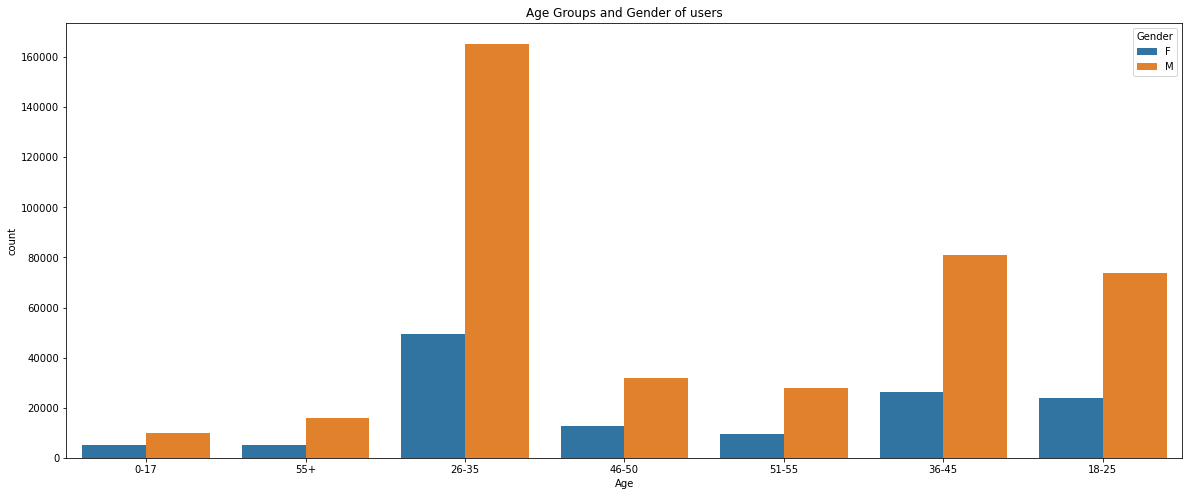

In [38]:
# What age group and gender should be marketed to?
plt.figure(figsize = (20,8))
sns.countplot(bf['Age'],hue=bf['Gender'])
plt.title("Age Groups and Gender of users");

__Conclusion from Data__

Males aged between 26-35 rank the highest amoung the dataset. Business can use this information to help specify their target market (Males aged between 26-35). 

In [39]:
# What occupations have the higest purchase rate?
bf_job = bf['Occupation'].value_counts()

In [53]:
bf_job

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

In [54]:
bf_job.sort_values()

8      1524
9      6153
18     6525
13     7548
19     8352
11    11338
15    11812
5     11985
10    12623
3     17366
6     19822
16    24790
2     25845
14    26712
12    30423
20    32910
17    39090
1     45971
7     57806
0     68120
4     70862
Name: Occupation, dtype: int64

Text(0.5, 1.0, 'Job Types and Purchase Amounts')

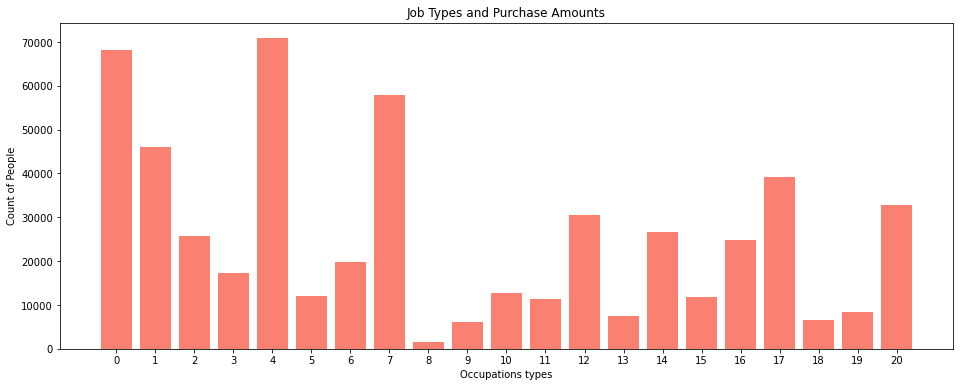

In [61]:
plt.figure(figsize = (16,6))
plt.bar(bf_job.index, bf_job.values,color = 'salmon')
plt.xticks(bf_job.index)
plt.xlabel("Occupations types")
plt.ylabel("Count of People")
plt.title("Job Types and Purchase Amounts")

__Conclusion from Data__

- Knwoing what job customers have can give better insight into their spending resources. Each job has it's own pay scale and business can adjust to that pay level to help attract the right customer. 

- If a business wants to attract more customer how have a lower pay scale they can lower prices on Black Friday to ensure the price of product is affordable to people with that pay scale.  



# Final Conclusion of Data 

If a store owner had access to this data analysis what would they do? what would they sell? What age group and gender spends the most money. Apply this knowledge in a practical and realistic way.

__This data anaylsis reveals a few key points a store owner could use for Black Friday__ 

1: Knowing what users spend the most money.

2: The most popular items being bought from thier store.

3: What age group and gender are buying from their store.

4: The type of customer's jobs that spend money at the store. 